In [ ]:
#Problem 1: Perform a classification task with knn from scratch.
#1 Load the Dataset:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv')
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSummary Statistics:")
print(df.describe())

print("\nUnique Values Per Column:")
print(df.nunique())

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non

In [ ]:
#2 Handle Missing Data:
import pandas as pd
import numpy as np

file_path = "/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv"
df = pd.read_csv(file_path)

df.fillna(df.mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# 3 Feature Engineering:
import pandas as pd
dataset = "/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv"
df = pd.read_csv(dataset)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

np.random.seed(0)
indices = np.arange(X.shape[0])
np.random.shuffle(indices)

split_index = int(0.7 * X.shape[0])

X_train = X[indices[:split_index]]
y_train = y[indices[:split_index]]
X_test = X[indices[split_index:]]
y_test = y[indices[split_index:]]

print(f"Training set shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Training set shapes: X_train: (537, 8), y_train: (537,)
Test set shapes: X_test: (231, 8), y_test: (231,)


In [ ]:
#4 Implement KNN:
import numpy as np
from collections import Counter

Euclidean_Distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y): # Moved fit outside of __init__
        self.X_train, self.y_train = X, y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [Euclidean_Distance(x, x_train) for x_train in self.X_train]
        k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]]
        return Counter(k_nearest).most_common(1)[0][0]
data = pd.read_csv("/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv")
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", np.mean(y_test == y_pred) * 100, "%")

Accuracy: 68.18181818181817 %


In [ ]:
#Problem-2 Experimentation:
#1 Repeat the Classification Task:
import numpy as np
import pandas as pd
from collections import Counter

Euclidean_Distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train, self.y_train = X, y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [Euclidean_Distance(x, x_train) for x_train in self.X_train]
        k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]]
        return Counter(k_nearest).most_common(1)[0][0]

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

data = pd.read_csv("/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv")
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)

knn = KNN(k=3)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

accuracy = np.mean(y_test == y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 73.38%


In [ ]:
#2 Comparative Analysis:
import numpy as np
import pandas as pd
from collections import Counter

Euclidean_Distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train, self.y_train = X, y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [Euclidean_Distance(x, x_train) for x_train in self.X_train]
        k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]]
        return Counter(k_nearest).most_common(1)[0][0]

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

data = pd.read_csv("/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv")
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred_original = knn.predict(X_test)
accuracy_original = np.mean(y_test == y_pred_original) * 100

X_train_scaled = standardize(X_train)
X_test_scaled = standardize(X_test)
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = np.mean(y_test == y_pred_scaled) * 100

print(f"Accuracy on original dataset: {accuracy_original:.2f}%")
print(f"Accuracy on scaled dataset: {accuracy_scaled:.2f}%")


Accuracy on original dataset: 68.18%
Accuracy on scaled dataset: 73.38%


How Scaling Impacts KNN Performance:
KNN relies on calculating the distance between data points to make predictions, and features with different scales can affect this distance. If one feature has a much larger range than others, it can dominate the distance calculation, leading to biased predictions. By scaling the data, each feature is normalized to have equal influence on the distance metric. This ensures that all features contribute equally to the prediction process, improving the accuracy of the KNN algorithm, especially when features have varied units or scales.

Reason for Changes in Accuracy:
Scaling often improves KNN accuracy because it eliminates the bias introduced by features with larger ranges. When the data is scaled, all features are treated equally, allowing the algorithm to make more reliable predictions. In cases where features already have similar ranges, scaling may not make much of a difference, or in rare instances, could slightly reduce accuracy due to small numerical errors. However, for datasets with varied feature ranges, scaling tends to boost performance.

k | Accuracy (Original) | Time (Original) | Accuracy (Scaled) | Time (Scaled)
1 | 61.69% | 0.6118s | 72.08% | 0.6250s
2 | 61.69% | 0.6210s | 72.08% | 0.6107s
3 | 68.18% | 0.6147s | 73.38% | 1.0703s
4 | 67.53% | 1.0603s | 75.32% | 1.0598s
5 | 70.13% | 1.1041s | 72.73% | 0.7442s
6 | 69.48% | 0.6210s | 76.62% | 0.6265s
7 | 72.08% | 0.5954s | 74.03% | 0.6074s
8 | 70.78% | 0.6069s | 74.03% | 0.5937s
9 | 70.78% | 0.6035s | 73.38% | 0.6162s
10 | 70.13% | 0.6267s | 76.62% | 0.5982s
11 | 71.43% | 0.6163s | 73.38% | 0.6096s
12 | 72.08% | 0.6003s | 75.97% | 0.6151s
13 | 72.08% | 0.5997s | 75.32% | 0.9433s
14 | 71.43% | 1.0425s | 75.97% | 1.0700s
15 | 70.78% | 1.0910s | 75.97% | 0.7599s


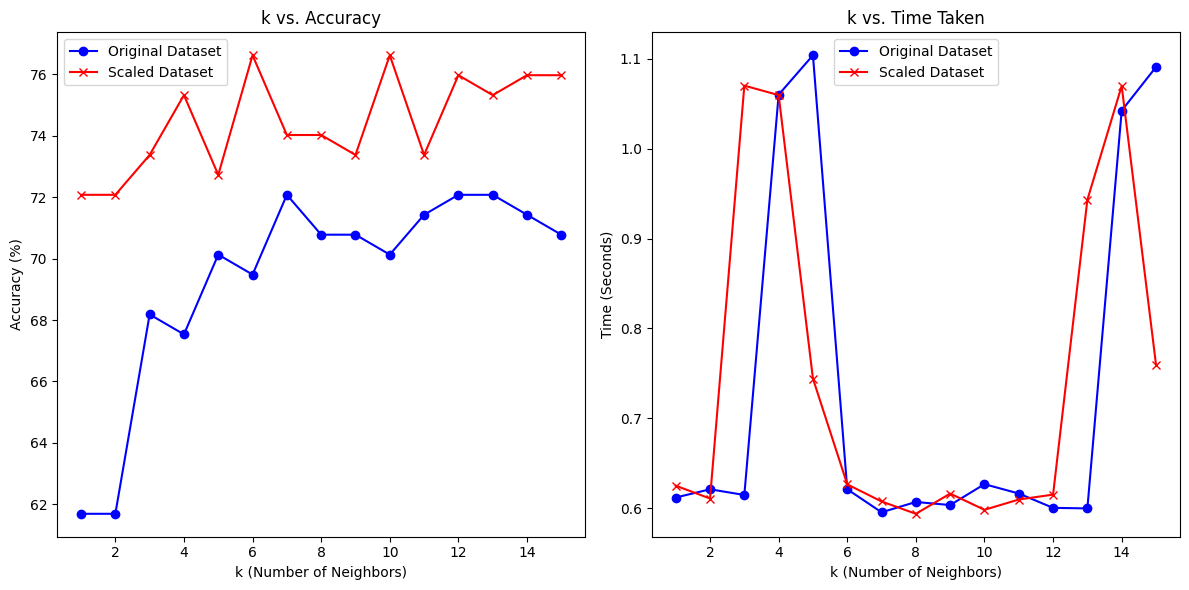

In [ ]:
#Problem 3 Experimentation with k:
#1 Vary the number of neighbors -k:
import numpy as np
import pandas as pd
from collections import Counter
import time

Euclidean_Distance = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train, self.y_train = X, y

    def predict(self, X):
        return [self._predict(x) for x in X]

    def _predict(self, x):
        distances = [Euclidean_Distance(x, x_train) for x_train in self.X_train]
        k_nearest = [self.y_train[i] for i in np.argsort(distances)[:self.k]]
        return Counter(k_nearest).most_common(1)[0][0]

def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

data = pd.read_csv("/content/drive/MyDrive/Week2/Dataset-20241217T012739Z-001/Dataset/diabetes.csv")
X, y = data.iloc[:, :-1].values, data.iloc[:, -1].values

split = int(0.8 * len(X))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

k_values = list(range(1, 16))
accuracy_original = []
accuracy_scaled = []
time_original = []
time_scaled = []

for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train, y_train)

    start_time = time.time()
    y_pred_original = knn.predict(X_test)
    time_taken_original = time.time() - start_time

    accuracy_original.append(np.mean(y_test == y_pred_original) * 100)
    time_original.append(time_taken_original)

    X_train_scaled = standardize(X_train)
    X_test_scaled = standardize(X_test)
    knn.fit(X_train_scaled, y_train)

    start_time = time.time()
    y_pred_scaled = knn.predict(X_test_scaled)
    time_taken_scaled = time.time() - start_time

    accuracy_scaled.append(np.mean(y_test == y_pred_scaled) * 100)
    time_scaled.append(time_taken_scaled)

print("k | Accuracy (Original) | Time (Original) | Accuracy (Scaled) | Time (Scaled)")
for i, k in enumerate(k_values):
    print(f"{k} | {accuracy_original[i]:.2f}% | {time_original[i]:.4f}s | {accuracy_scaled[i]:.2f}% | {time_scaled[i]:.4f}s")

#2
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_original, label='Original Dataset', marker='o', color='b')
plt.plot(k_values, accuracy_scaled, label='Scaled Dataset', marker='x', color='r')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Dataset', marker='o', color='b')
plt.plot(k_values, time_scaled, label='Scaled Dataset', marker='x', color='r')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (Seconds)')
plt.legend()

plt.tight_layout()
plt.show()



Both calculation time and accuracy are impacted by the value of k. The best accuracy for scaled data is 76.62% at 𝑘 = 6 k=6 and 𝑘 = 10 k=10, whereas the maximum accuracy for the original data is 72.08% at 𝑘 = 7 k=7 and 𝑘 = 12 k=12. Accuracy is improved by scaling the data. In terms of computation time, greater values of k, such as k = 4, 14, 15, take longer. The optimum option in terms of accuracy and computing time is 𝑘 = 6k=6, which provides the maximum accuracy at a manageable computation time.